<a href="https://colab.research.google.com/github/ShawnLiu119/CapstoneProject_BankingMarketing/blob/main/BankMkt_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib import colors

**Distribution Exploration**



In [6]:
def create_hist(data, title):
    fig, axs = plt.subplots(1, 1,figsize =(10, 7), tight_layout = True)
    axs.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    axs = sns.distplot(data, hist=True).set(title=title + ' Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


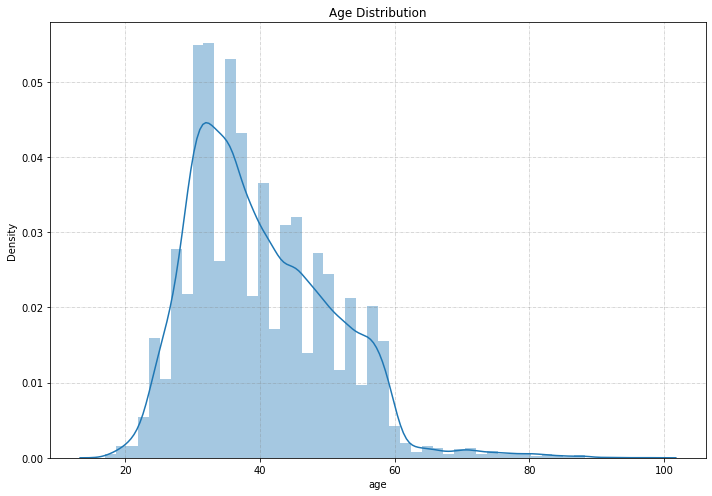

In [7]:
create_hist(data['age'], 'Age')

Yes

In [8]:
df_y = data[data['y'] == 'yes']
df_n = data[data['y'] =='no']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


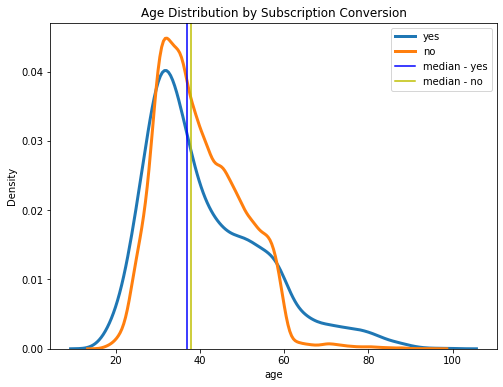

In [9]:
plt.figure(figsize=(8,6))
sns.distplot(df_y['age'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'yes')
sns.distplot(df_n['age'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'no')    

median_y = df_y['age'].median()
median_n = df_n['age'].median()

plt.axvline(x = median_y, color = 'b', label = 'median - yes')
plt.axvline(x = median_n, color = 'y', label = 'median - no')

plt.title('Age Distribution by Subscription Conversion')

plt.legend()

Yes

In [10]:
print(median_y, median_n)

37.0 38.0


some insights: the distribution of customer who subscribed or did not susbcribed the term deposit are pretty similar, interetingly the median age of subscriber is even younger than who did not by 1 year

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


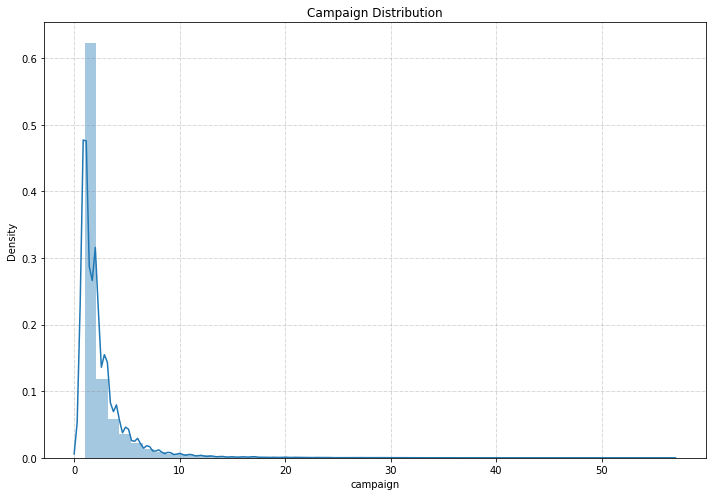

In [11]:
create_hist(data['campaign'], 'Campaign')

**Corrleation**

In [12]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


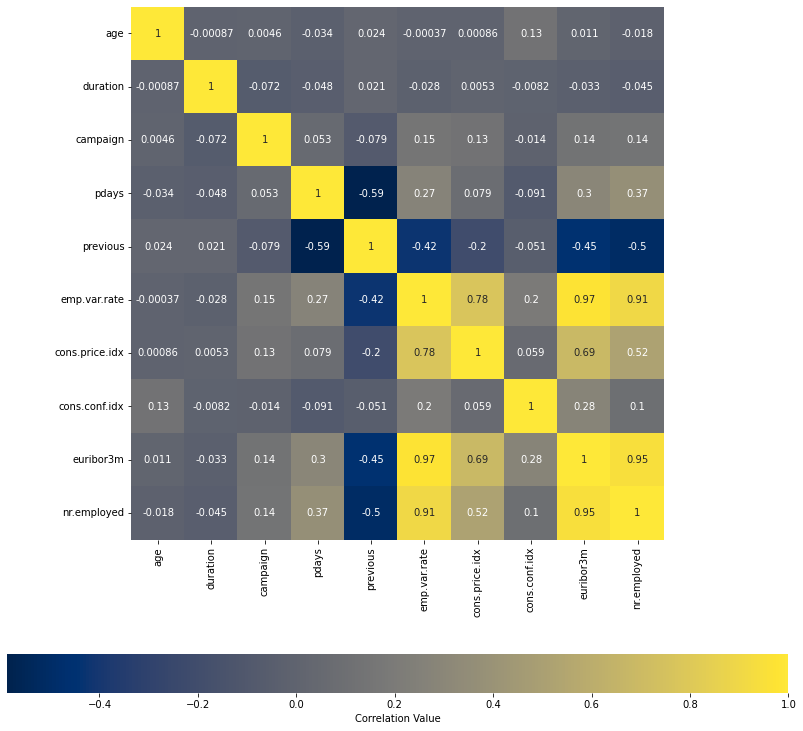

In [13]:
cor_df = data.corr()
plt.subplots(figsize = (14, 14))
sns.heatmap(cor_df,cmap = "cividis",annot = True, square = True, cbar_kws = {'label': 'Correlation Value', 'orientation': 'horizontal'});

Yes

**Conversion by different attribute**

In [14]:
data['binary'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [15]:
def conversion_bar(groupcol):
    df = pd.DataFrame(data.groupby(groupcol).apply(lambda x: x['binary'].sum()/len(x)).reset_index()).rename(columns={0:'conversion_rate'})
    fig, axs = plt.subplots(1, 1,figsize =(12, 5), tight_layout = True)
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=groupcol, y='conversion_rate', data=df)
    ax.title.set_text('conversion rate by {}'.format(groupcol))
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


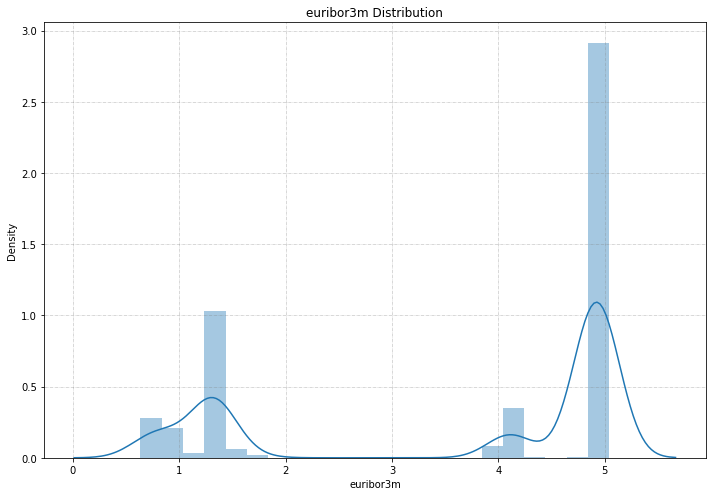

In [16]:
create_hist(data['euribor3m'], 'euribor3m')

Yes

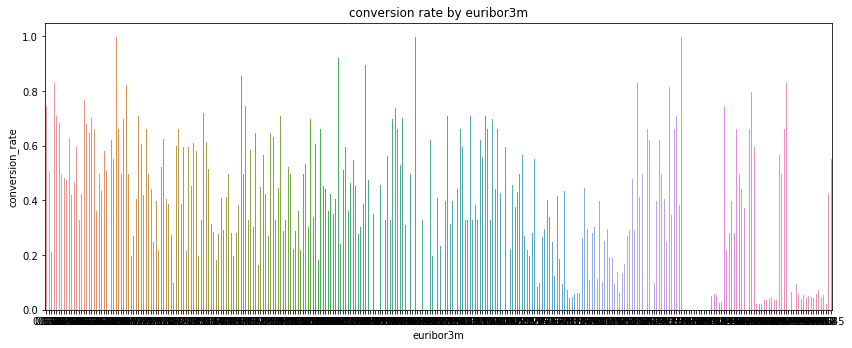

In [17]:
conversion_bar('euribor3m')

In [18]:
data['ir'] = pd.cut(data["euribor3m"], np.arange(0, 6, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


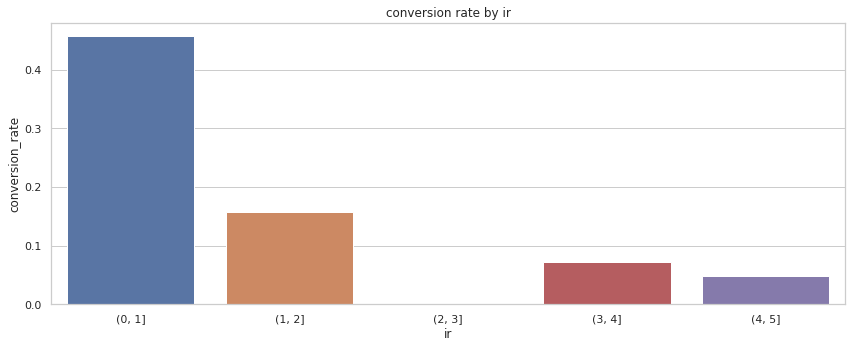

In [19]:
conversion_bar('ir')

No

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


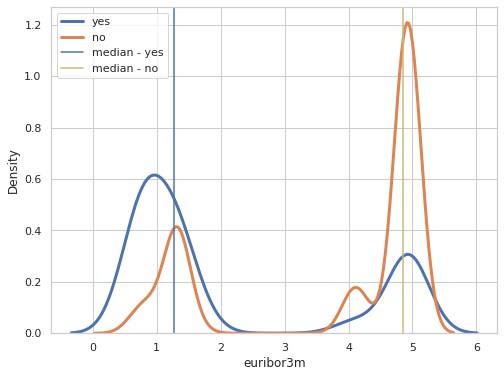

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(df_y['euribor3m'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'yes')
sns.distplot(df_n['euribor3m'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'no')    

median_y = df_y['euribor3m'].median()
median_n = df_n['euribor3m'].median()

plt.axvline(x = median_y, color = 'b', label = 'median - yes')
plt.axvline(x = median_n, color = 'y', label = 'median - no')

plt.legend()

Yes

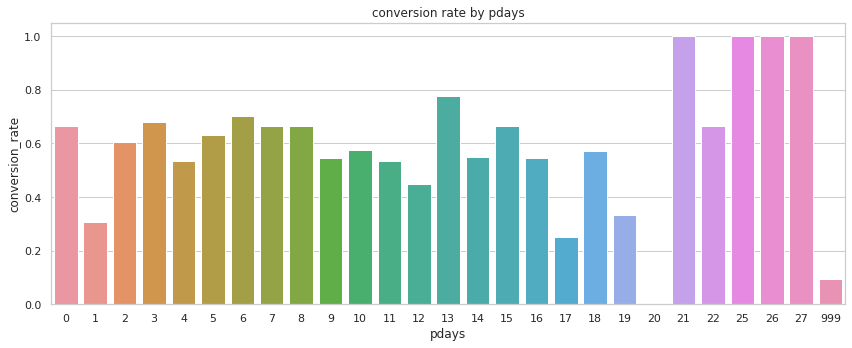

In [21]:
conversion_bar('pdays')

No

In [22]:
data['weekly'] = pd.cut(data["pdays"], np.arange(0, 90, 7))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


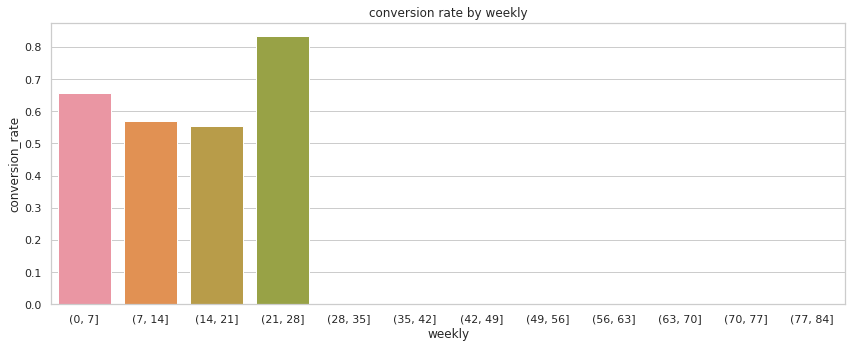

In [23]:
conversion_bar('weekly')

-people don't subscriber after 1 month following thg last contact
- conversion rate is higher when date get closer to 30 days

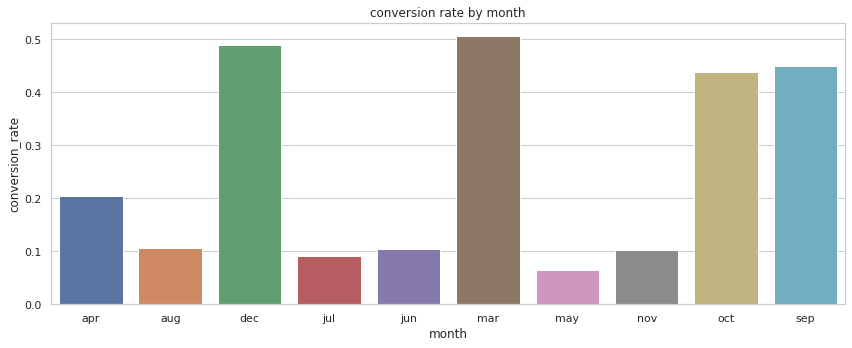

In [24]:
conversion_bar('month')

- holiday, people saves a lum sum of money,
- summer, people go vocation
- september, students start school
- there is no Jan, Feb data points

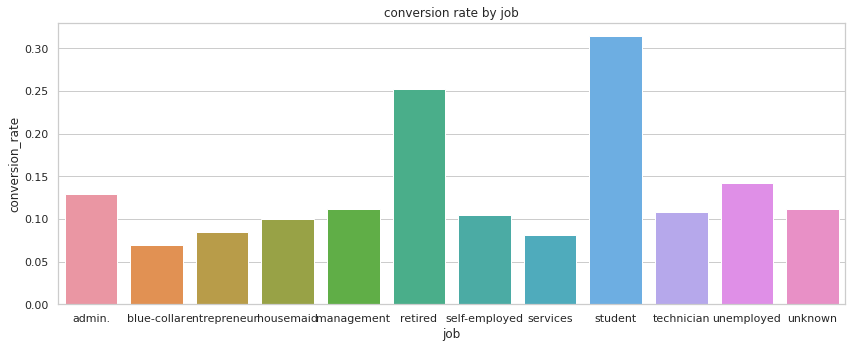

In [25]:
conversion_bar('job')

can we group by categories. 
retired & students & unemployed are categorized 'unemployed'????
all others into "employed"????

retired and students are perceived more risk averse than other occupations, so maybe that's why they prefer term deposit??? 

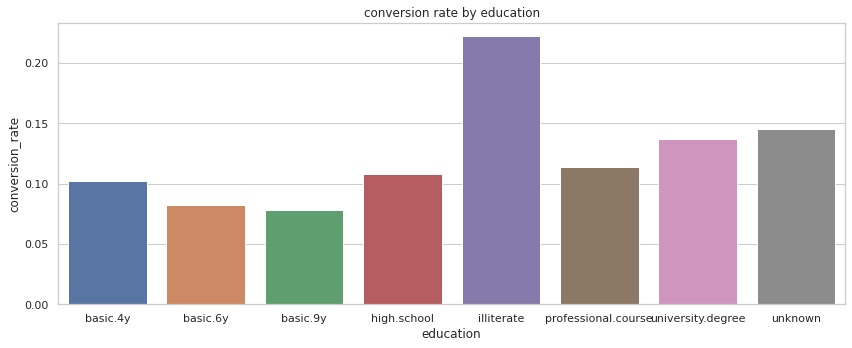

In [26]:
conversion_bar('education')

In [27]:
data['education'].value_counts()

data_1 = data.copy()
data_1 = data_1[data_1['education'] != 'illiterate']

data_1['edu_new'] = data_1['education'].map({'basic.4y': 'pre_high', 
                                         'basic.9y': 'pre_high',
                                         'basic.6y': 'pre_high',
                                         'university.degree' : 'post_high',
                                         'professional.course':'post_high',
                                         'high.school' : 'high',
                                         'unknown' :'unknown' })

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [28]:
data_1['edu_new'].value_counts()

post_high    17411
pre_high     12513
high          9515
unknown       1731
Name: edu_new, dtype: int64

In [29]:
data_1['job'].value_counts()

admin.           10421
blue-collar       9246
technician        6743
services          3969
management        2924
retired           1717
entrepreneur      1454
self-employed     1418
housemaid         1059
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [30]:
def map_job(row):
    if row['job'] in ['admin.', 'management', 'entrepreneur','self-employed']:
        cat = 'white_collar'
    elif row['job'] in ['housemaid', 'blue-collar', 'technician', 'services']:
        cat = 'blue_collar'
    elif row['job'] in ['student', 'retired', 'unemployed']:
        cat = 'not_working'
    else:
        cat = 'unknown'
    return cat

data_1['job_new'] = data_1.apply(map_job, axis=1)
data_1['job_new'].value_counts(dropna = False)

blue_collar     21017
white_collar    16217
not_working      3606
unknown           330
Name: job_new, dtype: int64

In [31]:
data_1['month'].value_counts()

may    13766
jul     7169
aug     6173
jun     5318
nov     4098
apr     2630
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

????
figure out when they start the campaign????
May 2008 - June 2013

In [32]:
def map_month(row):
    if row['month'] in ['mar', 'apr', 'may']:
        cat = 'spring'
    elif row['month'] in ['jun', 'jul', 'aug']:
        cat = 'summer'
    elif row['month'] in ['sep', 'oct', 'nov']:
        cat = 'fall'
    else:
        cat = 'winter'
    return cat

data_1['season'] = data_1.apply(map_month, axis=1)
data_1['season'].value_counts(dropna = False)

summer    18660
spring    16942
fall       5386
winter      182
Name: season, dtype: int64

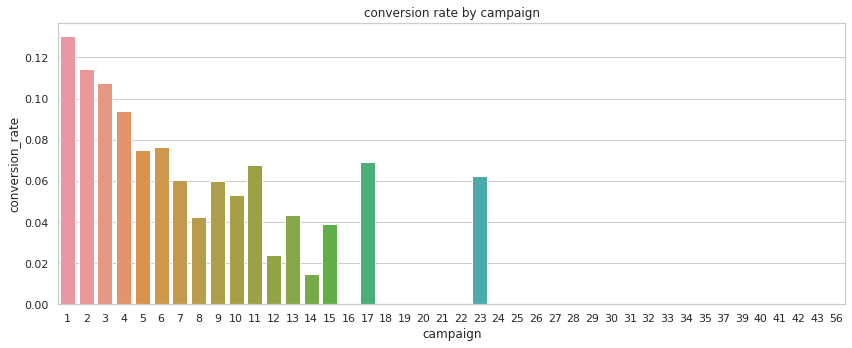

In [33]:
conversion_bar('campaign')

increasing contact frequency does not seem to improve the conversion rate

11 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

## PCA Analysis - Engineered Featureas w/h one-hot encoding

In [34]:
data_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'binary', 'ir',
       'weekly', 'edu_new', 'job_new', 'season'],
      dtype='object')

In [35]:
df_raw = data_1[['age', 'marital', 'default', 'housing', 'loan',
       'contact', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'binary', 'ir',
       'weekly', 'edu_new', 'job_new', 'season']]

In [36]:
cols = df_raw.columns
num_cols = df_raw._get_numeric_data().columns
cat_col = list(set(cols) - set(num_cols))
cat_col

['poutcome',
 'ir',
 'loan',
 'season',
 'job_new',
 'edu_new',
 'default',
 'day_of_week',
 'weekly',
 'marital',
 'housing',
 'contact']

In [37]:
# One hot encoding - to convert categorical data to continuous
df_raw[cat_col] = df_raw[cat_col].astype(str)
df_pca = pd.get_dummies(df_raw)
df_pca.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,edu_new_pre_high,edu_new_unknown,job_new_blue_collar,job_new_not_working,job_new_unknown,job_new_white_collar,season_fall,season_spring,season_summer,season_winter
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,1,0,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0


In [38]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41170 entries, 0 to 41187
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41170 non-null  int64  
 1   duration              41170 non-null  int64  
 2   campaign              41170 non-null  int64  
 3   pdays                 41170 non-null  int64  
 4   previous              41170 non-null  int64  
 5   emp.var.rate          41170 non-null  float64
 6   cons.price.idx        41170 non-null  float64
 7   cons.conf.idx         41170 non-null  float64
 8   euribor3m             41170 non-null  float64
 9   nr.employed           41170 non-null  float64
 10  binary                41170 non-null  int64  
 11  marital_divorced      41170 non-null  uint8  
 12  marital_married       41170 non-null  uint8  
 13  marital_single        41170 non-null  uint8  
 14  marital_unknown       41170 non-null  uint8  
 15  default_no         

In [39]:
# Standardizing
from sklearn.preprocessing import StandardScaler
num_col = data._get_numeric_data().columns
scaler = StandardScaler()
df_pca[num_col]=scaler.fit_transform(df_pca[num_col])
df_pca.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,edu_new_pre_high,edu_new_unknown,job_new_blue_collar,job_new_not_working,job_new_unknown,job_new_white_collar,season_fall,season_spring,season_summer,season_winter
0,1.533626,0.010503,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,1,0,1,0,0,0,0,1,0,0
1,1.629600,-0.421496,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,0,0,1,0,0,0,0,1,0,0
2,-0.289875,-0.124497,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,0,0,1,0,0,0,0,1,0,0
3,-0.001954,-0.413782,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,1,0,0,0,0,1,0,1,0,0
4,1.533626,0.187932,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,0,0,1,0,0,0,0,1,0,0


In [40]:
pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=3b8f5cbe9dade058fa5bdfb3013939d32748d2ff8618f9536c1586dfa20d9e0f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [41]:
# PCA
from sklearn.decomposition import PCA
# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp in range(3, df_pca.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(df_pca)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(df_pca)
cluster_df=Final_PCA.transform(df_pca)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 14 components, we can explain 0.85882863938784% of the variability in the original data.


In [42]:
train_features = df_pca.drop(['binary' ], axis=1)

model = PCA(n_components=10).fit(train_features)
X_pc = model.transform(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = train_features.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_pca_fea = pd.DataFrame(dic.items())

In [43]:
df_pca_fea = df_pca_fea.rename(columns={0: 'PCA', 1: 'Feature'})
df_pca_fea

,PCA,Feature
0,PC0,euribor3m
1,PC1,pdays
2,PC2,age
3,PC3,duration
4,PC4,cons.conf.idx
5,PC5,campaign
6,PC6,contact_cellular
7,PC7,job_new_blue_collar
8,PC8,housing_yes
9,PC9,previous


## PCA Analysis - Engineered Feature + Remove Economic w/h one-hot encoding

In [44]:
# remove duration
# remove bunch of macro economic indicators except euribor3m because they do not vary much

df_raw_2 =  data_1[['age', 'marital', 'default', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'poutcome',  'euribor3m', 'binary', 'edu_new', 'job_new', 'season', 'contact']]

In [45]:
def pca_test(df):
    col = df.columns
    num_col = df._get_numeric_data().columns
    cat_col = list(set(col) - set(num_col))

    df[cat_col] = df[cat_col].astype(str)
    df_d = pd.get_dummies(df)

    scaler = StandardScaler()
    df_d[num_col]=scaler.fit_transform(df_d[num_col])

    for comp in range(3, df_d.shape[1]):
        pca = PCA(n_components= comp, random_state=42)
        pca.fit(df_d)
        comp_check = pca.explained_variance_ratio_
        final_comp = comp
        if comp_check.sum() > 0.85:
            break
        
    Final_PCA = PCA(n_components= final_comp,random_state=42)
    Final_PCA.fit(df_d)
    cluster_df=Final_PCA.transform(df_d)
    num_comps = comp_check.shape[0]
    print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

In [46]:
pca_test(df_raw_2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Using 11 components, we can explain 0.8528693913839178% of the variability in the original data.


In [47]:
def pca_tran(df):
    col = df.columns
    num_col = df._get_numeric_data().columns
    cat_col = list(set(col) - set(num_col))

    df[cat_col] = df[cat_col].astype(str)
    df_d = pd.get_dummies(df)

    scaler = StandardScaler()
    df_d[num_col]=scaler.fit_transform(df_d[num_col])

    return df_d


In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_t = pca_tran(df_raw_2)
principalComponents = pca.fit_transform(df_t)
principalDF = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [49]:
pca.components_

array([[ 1.39095799e-02, -1.37076219e-01, -4.84035197e-01,
         5.36251853e-01, -4.83166908e-01,  3.60547668e-01,
        -1.90112218e-03, -2.94002132e-02,  3.10258738e-02,
         2.75461510e-04,  5.37292564e-02, -5.37223448e-02,
        -6.91154258e-06, -1.71286458e-02, -2.91041033e-04,
         1.74196868e-02,  4.33924087e-04, -2.91041033e-04,
        -1.42883053e-04,  8.95650303e-02, -1.70896366e-01,
         8.13313357e-02,  3.37065406e-03,  2.01132238e-02,
        -2.60598091e-02,  2.57593124e-03, -4.48250238e-02,
         3.15277463e-02, -3.95108387e-04,  1.36923859e-02,
         4.75200668e-02,  3.87459586e-02, -9.08943742e-02,
         4.62834885e-03,  1.16913192e-01, -1.16913192e-01],
       [ 8.84758045e-01,  1.55129507e-01, -1.42562482e-01,
         5.97513535e-02,  1.46565131e-01,  5.75709197e-02,
         3.89222293e-02,  1.89529967e-01, -2.28443814e-01,
        -8.38198052e-06, -1.04247609e-01,  1.04223430e-01,
         2.41790606e-05,  1.32972006e-02,  1.32750150e-

In [50]:
pca.explained_variance_ratio_

array([0.22859762, 0.10980508])

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [51]:
###Factor Analysis of Mixed Data
#https://towardsdatascience.com/famd-how-to-generalize-pca-to-categorical-and-numerical-data-2ddbeb2b9210
#https://towardsdatascience.com/factor-analysis-of-mixed-data-5ad5ce98663c

In [52]:
data_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'binary', 'ir',
       'weekly', 'edu_new', 'job_new', 'season'],
      dtype='object')

In [54]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.1 MB/s 


In [ ]:
###using oringial features

Index(, 'binary', 'ir',
       'weekly', 'edu_new', 'job_new', 'season'],

In [55]:
df_ori = data_1[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]

In [56]:
from category_encoders import OrdinalEncoder

X_df = df_ori[df_ori.columns.difference(['y'])]
categorical_features = [col for col in X_df.columns if X_df[col].dtype == 'object']

encoder = OrdinalEncoder(
    cols=categorical_features,
    handle_unknown='ignore',
    return_df=True).fit(X_df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [59]:
X_df = encoder.transform(X_df)
x = StandardScaler().fit_transform(np.array(X_df))

In [64]:
df_ori['y'].unique()

array(['no', 'yes'], dtype=object)

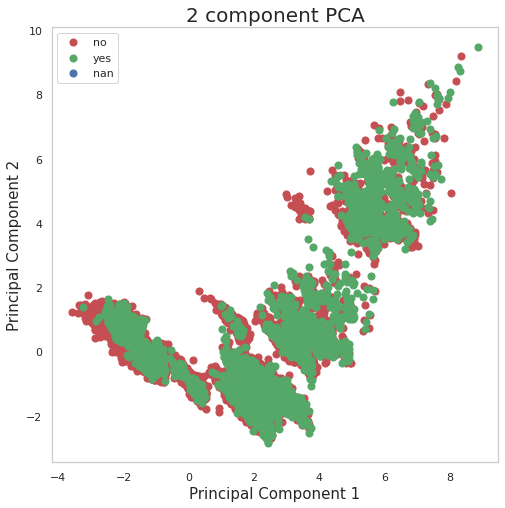

In [62]:
n=3
pca = PCA(n_components=n)
cols = []
for i in range(n):
    col_name = 'principal component {}'.format(i+1)
    cols.append(col_name)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = cols)
finalDf = pd.concat([principalDf, df_ori[['y']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(finalDf.y.unique())
colors = ['r', 'g', 'b','purple']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## FAMD Analysis (Prince Package)

In [66]:
pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from prince import FAMD
famd = FAMD(n_components =2, n_iter = 3, random_state = 101)

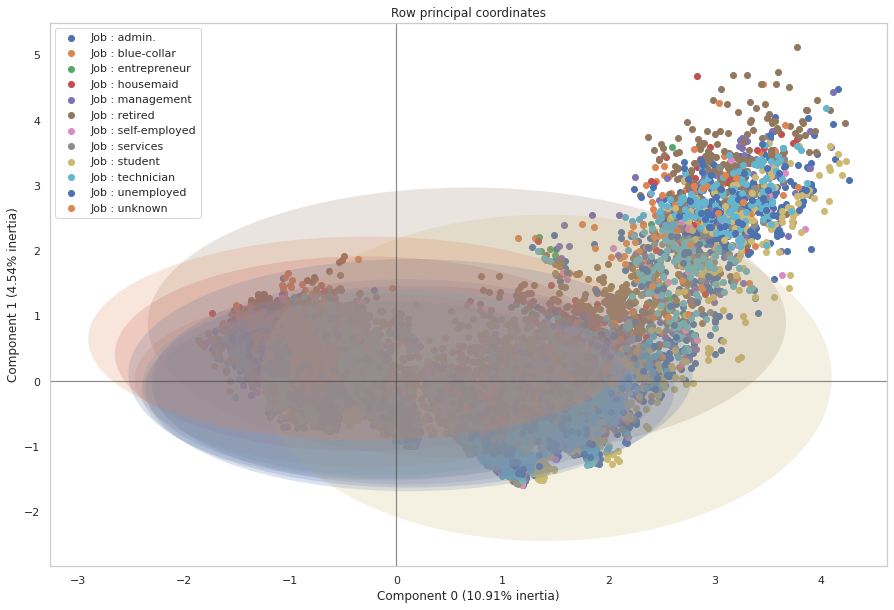

In [74]:
famd.fit(df_ori)
famd.transform(df_ori)
famd.plot_row_coordinates(df_ori,figsize=(15, 10),color_labels=['Job : {}'.format(t) for t in df_ori['job']] )

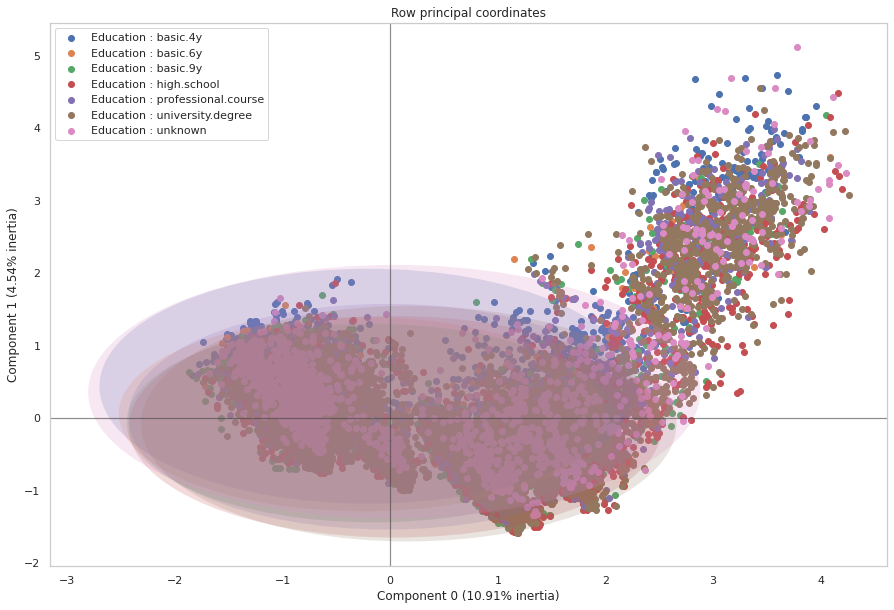

In [72]:
famd.fit(df_ori)
famd.transform(df_ori)
famd.plot_row_coordinates(df_ori,figsize=(15, 10),color_labels=['Education : {}'.format(t) for t in df_ori['education']] )

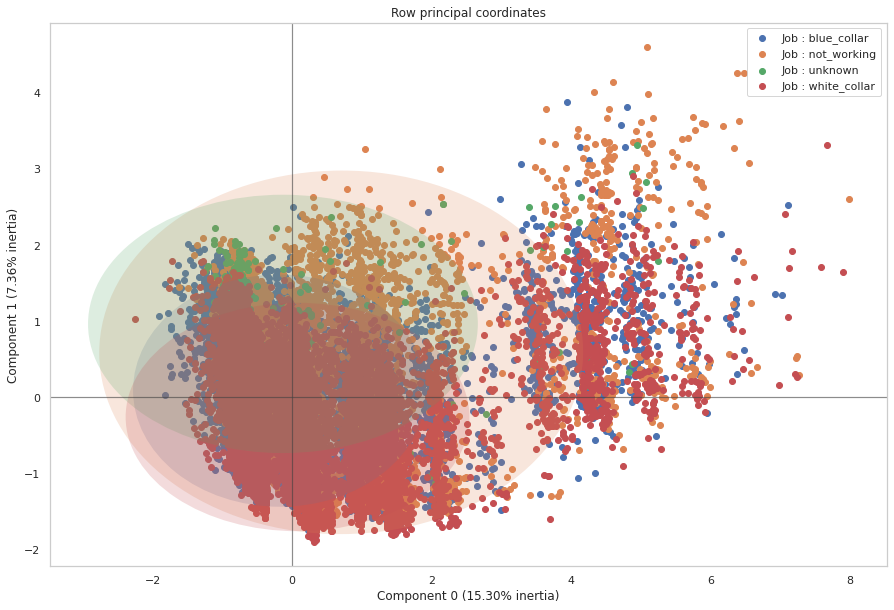

In [77]:
#applied same technique on revised df
## remove duration
# remove bunch of macro economic indicators except euribor3m because they do not vary much

# df_raw_2 =  data_1[['age', 'marital', 'default', 'housing', 'loan', 'campaign', 'pdays',
#        'previous', 'poutcome',  'euribor3m', 'binary', 'edu_new', 'job_new', 'season', 'contact']]


famd.fit(df_raw_2)
famd.transform(df_raw_2)
famd.plot_row_coordinates(df_raw_2,figsize=(15, 10),color_labels=['Job : {}'.format(t) for t in df_raw_2['job_new']] )


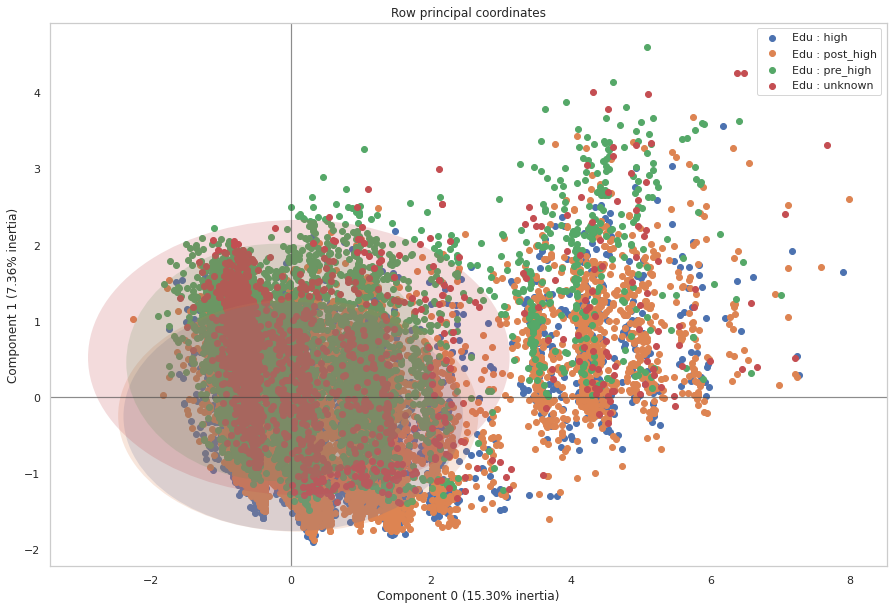

In [78]:
famd.fit(df_raw_2)
famd.transform(df_raw_2)
famd.plot_row_coordinates(df_raw_2,figsize=(15, 10),color_labels=['Edu : {}'.format(t) for t in df_raw_2['edu_new']] )

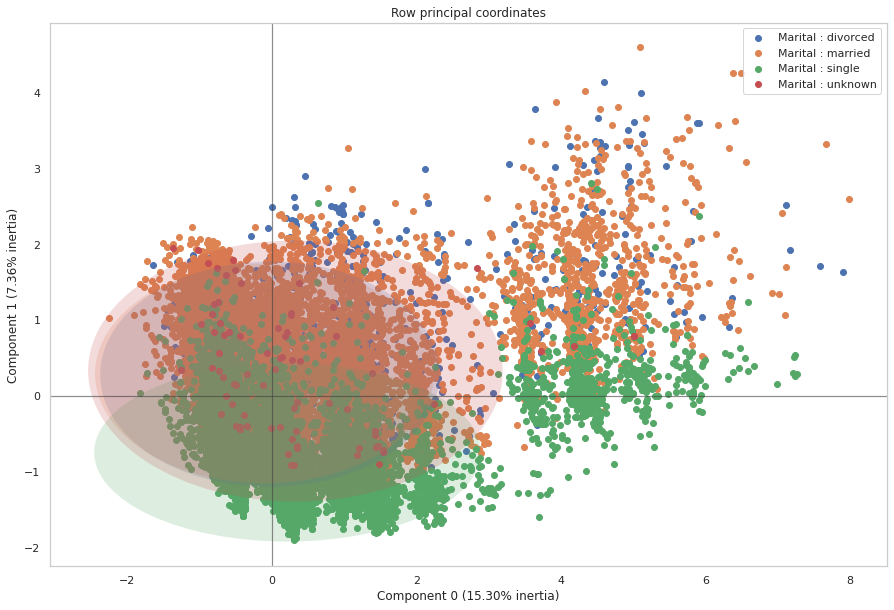

In [79]:
famd.fit(df_raw_2)
famd.transform(df_raw_2)
famd.plot_row_coordinates(df_raw_2,figsize=(15, 10),color_labels=['Marital : {}'.format(t) for t in df_raw_2['marital']] )

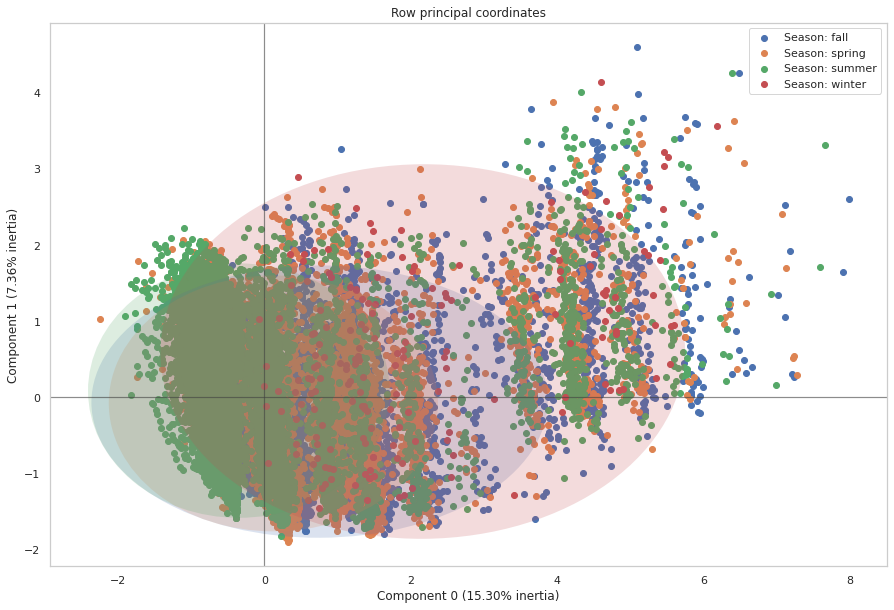

In [80]:
famd.fit(df_raw_2)
famd.transform(df_raw_2)
famd.plot_row_coordinates(df_raw_2,figsize=(15, 10),color_labels=['Season: {}'.format(t) for t in df_raw_2['season']] )

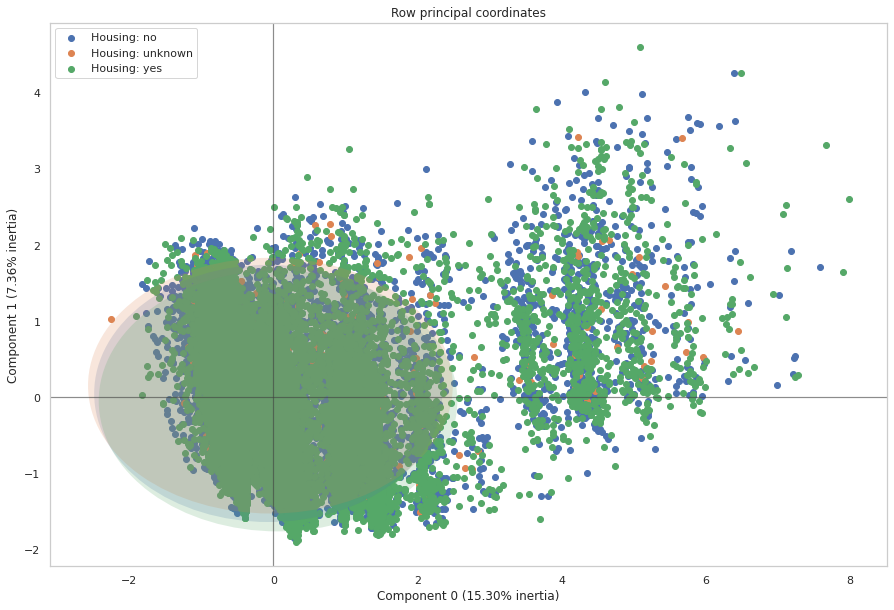

In [81]:
famd.fit(df_raw_2)
famd.transform(df_raw_2)
famd.plot_row_coordinates(df_raw_2,figsize=(15, 10),color_labels=['Housing: {}'.format(t) for t in df_raw_2['housing']] )

In [117]:
###since the above mentioned categorical does not help distinguish the principal component, goign to apply Feature Selection to filter out some irrelevant features

df_raw3 = df_ori.copy()

df_raw3.y.replace(('yes', 'no'), (1, 0), inplace=True)
df_raw3.default.replace(('yes', 'no'), (1, 0), inplace=True)
df_raw3.housing.replace(('yes', 'no'), (1, 0), inplace=True)
df_raw3.loan.replace(('yes', 'no'), (1, 0), inplace=True)

df_raw3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [118]:
cols = df_raw3.columns
num_cols = df_raw3._get_numeric_data().columns
cat_col = list(set(cols) - set(num_cols))

df_raw3[cat_col] = df_raw3[cat_col].astype(str)
df_fs = pd.get_dummies(df_raw3)
df_fs.head()

num_col = df_raw3._get_numeric_data().columns
scaler = StandardScaler()
df_fs[num_col]=scaler.fit_transform(df_fs[num_col])
df_fs.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533626,0.010503,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,0,0,0,1,0,0,0,0,1,0
1,1.629600,-0.421496,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,0,0,0,1,0,0,0,0,1,0
2,-0.289875,-0.124497,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,0,0,0,1,0,0,0,0,1,0
3,-0.001954,-0.413782,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,0,0,0,1,0,0,0,0,1,0
4,1.533626,0.187932,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,0,0,0,1,0,0,0,0,1,0


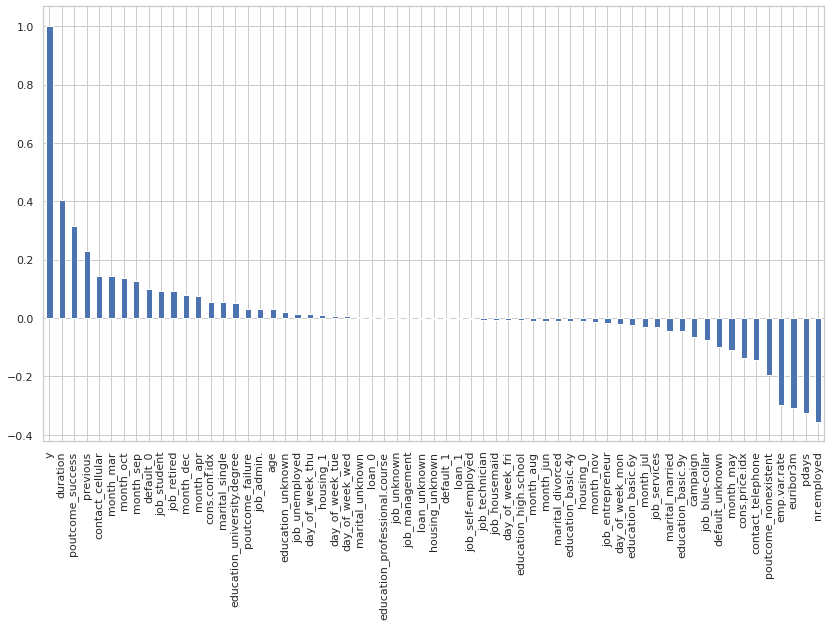

In [120]:
#Correlation plot
plt.figure(figsize=(14,8))
df_fsx = df_fs.drop(['y'], axis=1)
df_fs.corr()['y'].sort_values(ascending = False).plot(kind='bar')

In [121]:
target = df_fs[['y']]
df_feature = df_fs.drop(columns=['y'],axis=1)

In [122]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  

feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),  
           n_features_to_select=12,
           scoring='roc_auc',
           cv=2)
features = feature_selector.fit(df_feature,target)


Streaming output truncated to the last 5000 lines.
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 734, in _validate_y_class_weight
    check_classification_targets(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/multiclass.py", line 197, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

In [123]:
feature_name_selected = feature_selector.get_feature_names_out()
feature_name_selected

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar'], dtype=object)

In [124]:
from sklearn.decomposition import PCA
pca = PCA()
pca_X=pca.fit_transform(df_feature)
pca.get_covariance()

array([[ 1.00002429e+00, -8.20557665e-04,  4.57194726e-03, ...,
        -7.21574570e-04, -5.59618381e-03,  6.31775838e-03],
       [-8.20557665e-04,  1.00002429e+00, -7.16813112e-02, ...,
        -4.03545254e-03, -4.03804243e-03,  8.07349496e-03],
       [ 4.57194726e-03, -7.16813112e-02,  1.00002429e+00, ...,
        -2.09582528e-02,  3.00847190e-02, -9.12646618e-03],
       ...,
       [-7.21574570e-04, -4.03545254e-03, -2.09582528e-02, ...,
         9.25954931e-02, -8.91544190e-02, -3.44107415e-03],
       [-5.59618381e-03, -4.03804243e-03,  3.00847190e-02, ...,
        -8.91544190e-02,  1.17928793e-01, -2.87743738e-02],
       [ 6.31775838e-03,  8.07349496e-03, -9.12646618e-03, ...,
        -3.44107415e-03, -2.87743738e-02,  3.22154479e-02]])

In [125]:
explained_variance=pca.explained_variance_ratio_
explained_variance.shape

(62,)

In [126]:
pca = PCA(n_components=2)
pca_X=pca.fit_transform(df_feature)
pca.get_covariance()

array([[ 0.26408128,  0.02068869, -0.0002741 , ...,  0.00483774,
        -0.03920394,  0.0343662 ],
       [ 0.02068869,  0.1752064 , -0.00963293, ...,  0.00795175,
        -0.019139  ,  0.01118724],
       [-0.0002741 , -0.00963293,  0.20527904, ..., -0.02671924,
         0.041382  , -0.01466276],
       ...,
       [ 0.00483774,  0.00795175, -0.02671924, ...,  0.18777466,
        -0.03175446,  0.01224297],
       [-0.03920394, -0.019139  ,  0.041382  , ..., -0.03175446,
         0.23031714, -0.03029951],
       [ 0.0343662 ,  0.01118724, -0.01466276, ...,  0.01224297,
        -0.03029951,  0.18631971]])

In [127]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.26304573, 0.09167405])